In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Yibabe\Desktop\10academykifiyaAIMweek-10\data\proccessed_data.csv')

In [7]:
df.head(20)

,Date,Price,log_returns,rolling_volatility,rolling_mean_30,rolling_std_30,lag_1,lag_7,lag_30
0,1987-05-21,18.45,-0.970881,NaN,NaN,NaN,NaN,NaN,NaN
1,1987-05-22,18.55,0.540542,NaN,NaN,NaN,-0.970881,NaN,NaN
2,1987-05-25,18.60,0.269179,NaN,NaN,NaN,0.540542,NaN,NaN
3,1987-05-26,18.63,0.161160,NaN,NaN,NaN,0.269179,NaN,NaN
4,1987-05-27,18.60,-0.161160,NaN,NaN,NaN,0.161160,NaN,NaN
5,1987-05-28,18.60,0.000000,NaN,NaN,NaN,-0.161160,NaN,NaN
6,1987-05-29,18.58,-0.107585,NaN,NaN,NaN,0.000000,NaN,NaN
7,1987-06-01,18.65,0.376041,NaN,NaN,NaN,-0.107585,-0.970881,NaN
8,1987-06-02,18.68,0.160729,NaN,NaN,NaN,0.376041,0.540542,NaN
9,1987-06-03,18.75,0.374032,NaN,NaN,NaN,0.160729,0.269179,NaN


In [5]:
df.shape

(9010, 9)

In [8]:
 # Drop rows where any of the rolling or lagged values are NaN
df1 = df.dropna(subset=['rolling_volatility', 'rolling_mean_30', 'rolling_std_30', 'lag_1', 'lag_7', 'lag_30'])


Line Plots of Price, Rolling Mean, and Volatility

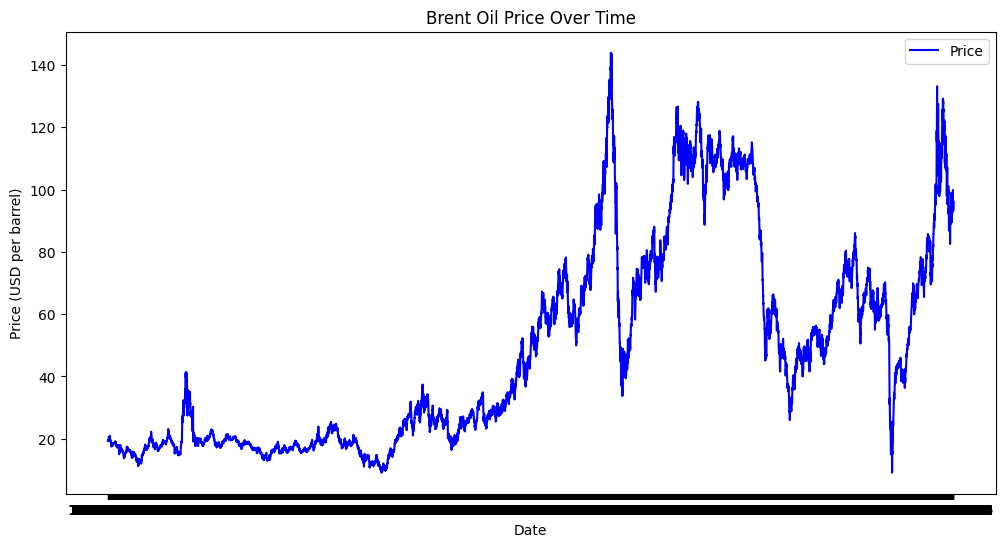

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Price'], color='blue', label='Price')
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

Plot Rolling Mean and Rolling Volatility

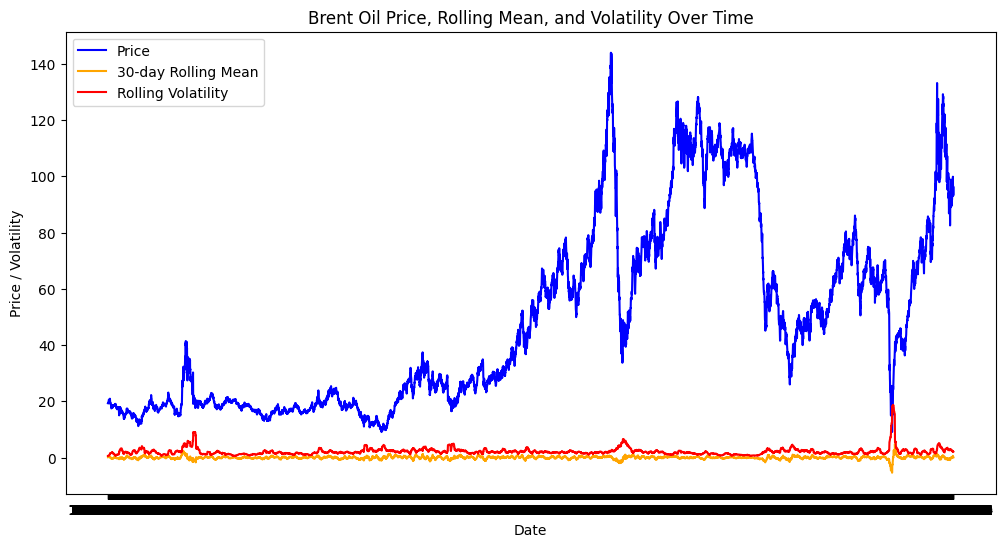

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Price'], color='blue', label='Price')
plt.plot(df1['Date'], df1['rolling_mean_30'], color='orange', label='30-day Rolling Mean')
plt.plot(df1['Date'], df1['rolling_volatility'], color='red', label='Rolling Volatility')
plt.title('Brent Oil Price, Rolling Mean, and Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Price / Volatility')
plt.legend()
plt.show()


Compute and Plot ACF and PACF for Price

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Drop any NaN values to avoid errors
price_series = df1['Price'].dropna()




<Figure size 1200x400 with 0 Axes>

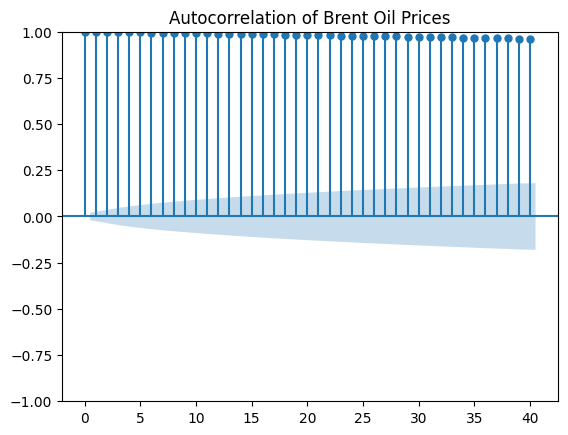

In [17]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(price_series, lags=40)
plt.title('Autocorrelation of Brent Oil Prices')
plt.show()


<Figure size 1200x400 with 0 Axes>

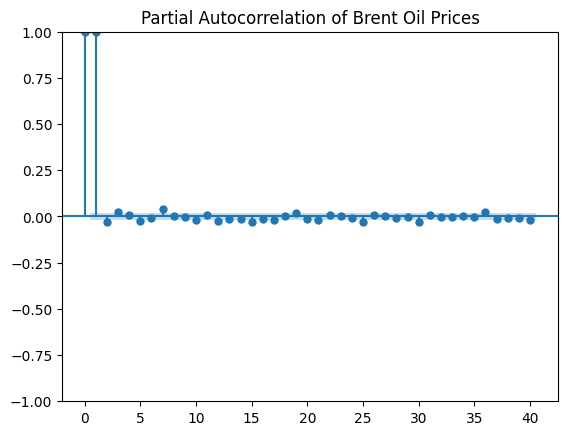

In [18]:

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(price_series, lags=40)
plt.title('Partial Autocorrelation of Brent Oil Prices')
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA

p = 1  # Order of autoregressive terms
d = 1  # Degree of differencing
q = 1  # Order of moving average terms

# Fit the ARIMA model
arima_model = ARIMA(df['Price'], order=(p, d, q))
arima_results = arima_model.fit()

# Display model summary
print(arima_results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9010
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14542.824
Date:                Mon, 04 Nov 2024   AIC                          29091.648
Time:                        21:10:36   BIC                          29112.966
Sample:                             0   HQIC                         29098.902
                               - 9010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4779      0.008    184.550      0.0

In [24]:
# Convert 'Date' column to datetime, ensuring it is naive (without timezone)
df1['Date'] = pd.to_datetime(df1['Date']).dt.tz_localize(None)


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_7968\2772835046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date']).dt.tz_localize(None)


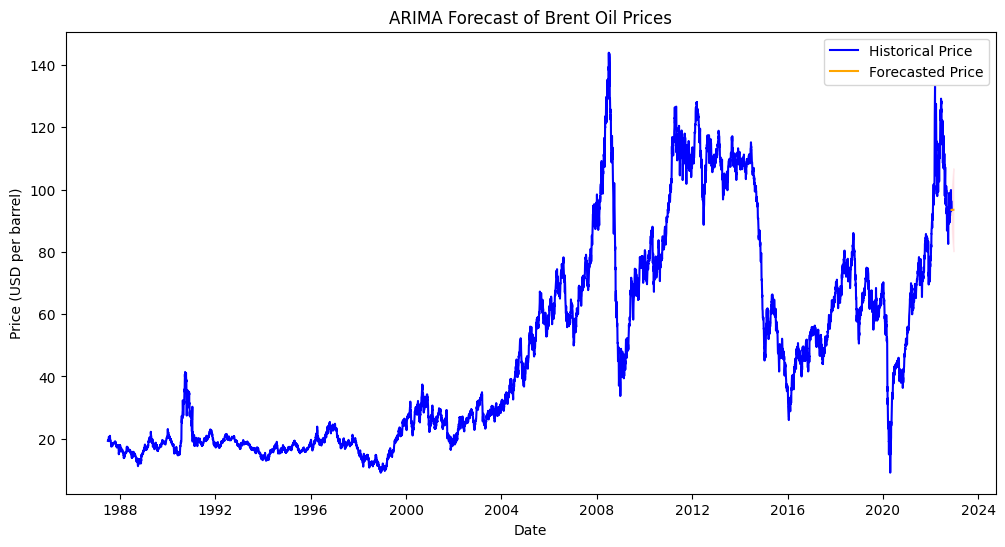

In [25]:
# Forecasting the next 30 days
forecast_steps = 30
forecast = arima_results.get_forecast(steps=forecast_steps)

# Ensure the last_date is in datetime format
last_date = pd.to_datetime(df1['Date'].iloc[-1])

# Create a new date index for the forecasted values
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Price'], label='Historical Price', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Price', color='orange')
plt.fill_between(forecast_index, 
                 forecast.conf_int()['lower Price'], 
                 forecast.conf_int()['upper Price'], 
                 color='pink', alpha=0.3)
plt.title('ARIMA Forecast of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()


In [35]:
import requests
from bs4 import BeautifulSoup

In [38]:


# Define the URL of the website to scrape
url = 'https://www.google.com/search?q=%27https%3A%2F%2Fwww.ft.com%2Fsearch%3Fq%3Doil%2Bprices%27&oq=%27https%3A%2F%2Fwww.ft.com%2Fsearch%3Fq%3Doil%2Bprices%27&gs_lcrp=EgZjaHJvbWUyBggAEEUYOdIBCDk5MjZqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8'

# Send a GET request
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')




In [39]:
# Find articles related to oil prices
articles = soup.find_all('article')  # Adjust this based on the website's structure

# Extract relevant information
for article in articles:
    title = article.find('h2').text  # Adjust this based on the website's structure
    published_date = article.find('time')['datetime']  # Adjust as needed
    link = article.find('a')['href']  # Adjust this based on the website's structure
    print(f"Title: {title}, Date: {published_date}, Link: {link}")

In [40]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the Reuters search page for oil prices
url = 'https://www.reuters.com/search/news?blob=oil+prices'

# Send a GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find articles related to oil prices
    articles = soup.find_all('div', class_='search-result-content')  # Adjust based on Reuters' structure

    # Extract relevant information
    for article in articles:
        # Extract the title
        title = article.find('h3').text.strip()  # Link is in the <h3> tag
        # Extract the link to the article
        link = 'https://www.reuters.com' + article.find('a')['href']
        # Published date is not always available in search results on Reuters
        published_date = article.find('time').text if article.find('time') else 'No date available'
        
        print(f"Title: {title}, Date: {published_date}, Link: {link}")

else:
    print(f"Error: {response.status_code}")


Error: 401


In [41]:
import requests
import pandas as pd

# Define the API endpoint and parameters
base_url = "http://api.worldbank.org/v2/country/{}/indicator/NY.GDP.MKTP.CD"
country_code = "US"  # Example for United States
params = {
    "date": "2000:2022",    # Specify the date range
    "format": "json",       # Specify the format
    "per_page": 1000        # Ensures we get all results
}

# Send the API request
response = requests.get(base_url.format(country_code), params=params)



In [42]:
# Check for success
if response.status_code == 200:
    data = response.json()[1]  # Skip the first element, which is metadata
    # Convert to DataFrame
    df = pd.DataFrame(data)
    df = df[['date', 'value']]  # Keep only date and value columns
    print(df.head())
else:
    print("Failed to retrieve data:", response.status_code)


   date           value
0  2022  25744108000000
1  2021  23594031000000
2  2020  21322950000000
3  2019  21521395000000
4  2018  20656516000000


In [44]:
df.to_csv(r"C:\Users\Yibabe\Desktop\10academykifiyaAIMweek-10\data\gdp_data.csv", index=False)


In [46]:
from fredapi import Fred
import pandas as pd

# Initialize the FRED client with your API key
fred = Fred(api_key="57d244af8b768e19ab63035109fc0a2d")




In [47]:
# Fetch GDP data (replace 'GDP' with other codes as needed)
gdp_data = fred.get_series('GDP', observation_start='2000-01-01', observation_end='2022-12-31')

# Convert the data to a DataFrame for easier handling
gdp_df = pd.DataFrame(gdp_data, columns=['GDP'])
gdp_df.index.name = 'Date'
print(gdp_df.head())



                  GDP
Date                 
2000-01-01  10002.179
2000-04-01  10247.720
2000-07-01  10318.165
2000-10-01  10435.744
2001-01-01  10470.231


In [50]:
# You can save the data to a CSV for later use
gdp_df.to_csv(r"C:\Users\Yibabe\Desktop\10academykifiyaAIMweek-10\data\gdp2_data.csv")

In [51]:
import requests

# Define your API key here
api_key = "0bcf5a2a92944aecaa15477d9275bcac"  # Replace with your actual API key

# Define the endpoint URL for the News API
url = "https://newsapi.org/v2/everything"

In [53]:

import requests

# Define your API key here
api_key = "0bcf5a2a92944aecaa15477d9275bcac"  # Replace with your actual API key

# Define the endpoint URL for the News API
url = "https://newsapi.org/v2/everything"
# Set up query parameters for the API request
params = {
    "q": "oil prices sanctions",  # Search query for relevant articles
    "from": "2022-01-01",         # Start date for articles
    "to": "2022-12-31",           # End date for articles
    "language": "en",             # Language preference
    "sortBy": "relevancy",        # Sort results by relevance
    "apiKey": api_key             # Include your API key
}

# Send a GET request to the News API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    articles = response.json().get("articles", [])  # Extract articles from response
    # Loop through each article and print the relevant information
    for article in articles:
        print(f"Title: {article['title']}")
        print(f"Date: {article['publishedAt']}")
        print(f"URL: {article['url']}\n")
else:
    print("Error:", response.status_code)


Error: 426
